#### importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset into python environment

In [3]:
data = pd.read_excel(r"F:\ICTAK\data sets\iris (1).xls")

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### dataset summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### basic statistics about the data

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### dimension of the dataset

In [7]:
data.shape

(150, 5)

#### columns in the data frame

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### Data preprocessing 

#### Checking for null values and filling null values

In [9]:
# Checking null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
# Filling null values
for col in ['SL', 'SW', 'PL']:
    data[col] = data[col].fillna(data[col].median())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Outlier detection and handling

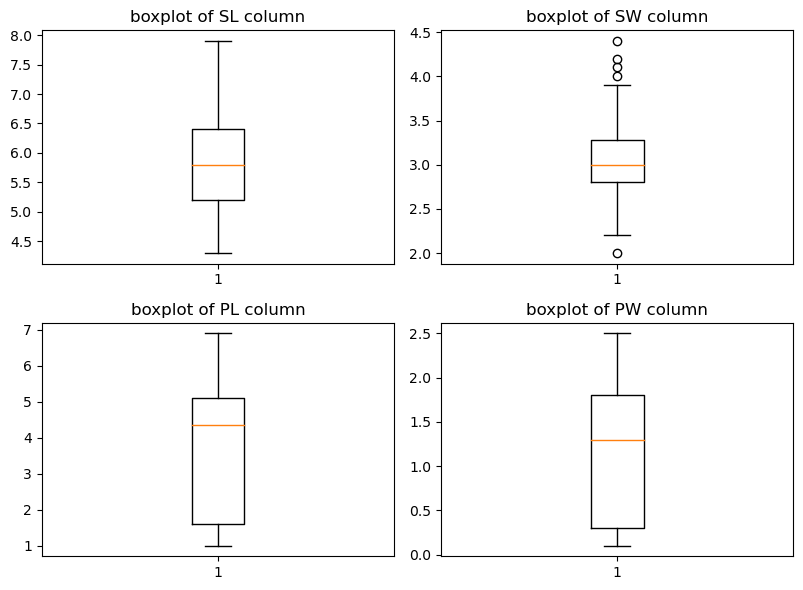

In [12]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.title("boxplot of SL column")
plt.boxplot(data['SL'])

plt.subplot(2,2,2)
plt.title("boxplot of SW column")
plt.boxplot(data['SW'])

plt.subplot(2,2,3)
plt.title("boxplot of PL column")
plt.boxplot(data['PL'])

plt.subplot(2,2,4)
plt.title("boxplot of PW column")
plt.boxplot(data['PW'])

plt.tight_layout()

#### Find 25th(Q1), 50th(Q2), and 75th(Q3) percentiles of the 'SW' column

In [13]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')

In [14]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


####  Find inter quartile range - IQR

In [15]:
IQR = Q3-Q1
print(IQR)

0.4500000000000002


#### Find lower and upper limits

In [16]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [17]:
print(lower_limit)
print(upper_limit)

2.1249999999999996
3.9250000000000003


#### Finding outliers

In [18]:
outlier = []
for x in data['SW']:
    if ((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [19]:
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


#### Finding index of outlier values

In [20]:
lower_val = data['SW']<lower_limit
upper_val = data['SW']>upper_limit

In [21]:
lower_ind = data.loc[lower_val].index
upper_ind = data.loc[upper_val].index

In [22]:
print(lower_ind)

Int64Index([60], dtype='int64')


In [23]:
print(upper_ind)

Int64Index([14, 15, 32, 33], dtype='int64')


#### Drop outliers

In [24]:
data.drop([14, 15, 32, 33, 60], inplace=True)

In [25]:
data.head(20)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### Encoding

In [26]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
data['Classification'] = le.fit_transform(data['Classification'])

In [28]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Classification

#### Splitting data into target and features

In [29]:
y = data['Classification']  # target
x = data.drop('Classification', axis=1)  #features

In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

In [31]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### splitting into train and test data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression(max_iter=1000)

In [36]:
# model building
log_model = log_reg.fit(x_train, y_train)

In [37]:
# model prediction
log_pred = log_model.predict(x_test)

In [38]:
log_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2])

#### Evaluating the model

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [40]:
print(confusion_matrix(y_test, log_pred))

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [41]:
print(accuracy_score(y_test, log_pred))

0.9310344827586207


In [42]:
print(recall_score(y_test, log_pred, average=None))    #for each class

[1.         0.88888889 0.90909091]


In [43]:
print(precision_score(y_test, log_pred, average=None))  #for each class

[1.         0.88888889 0.90909091]


#### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn.fit(x_train, y_train)
    y_pred_knn = knn_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred_knn)
    metric_k.append(acc)

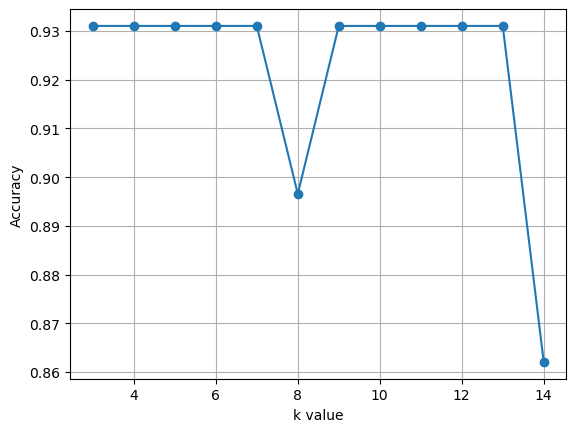

In [45]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [46]:
knn = KNeighborsClassifier(n_neighbors=4)
knn_model = knn.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

#### Evaluating KNN model

In [47]:
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn, average=None))
print(recall_score(y_test, y_pred_knn, average=None))

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
0.9310344827586207
[1.         0.88888889 0.90909091]
[1.         0.88888889 0.90909091]


#### SVM

In [48]:
from sklearn.svm import SVC

In [49]:
# rbf kernel
svm_rbf = SVC(kernel='rbf')

In [50]:
svm_rbf.fit(x_train, y_train)

SVC()

In [51]:
svm_pred1 = svm_rbf.predict(x_test)

#### Evaluating the svm (rbf kernel) model

In [52]:
print(confusion_matrix(y_test, svm_pred1))
print(accuracy_score(y_test, svm_pred1))
print(precision_score(y_test, svm_pred1, average=None))
print(recall_score(y_test, svm_pred1, average=None))

[[9 0 0]
 [0 8 1]
 [0 3 8]]
0.8620689655172413
[1.         0.72727273 0.88888889]
[1.         0.88888889 0.72727273]


In [53]:
# linear kernel
svm_lin = SVC(kernel='linear')

In [54]:
svm_lin.fit(x_train, y_train)

SVC(kernel='linear')

In [55]:
svm_pred2 = svm_lin.predict(x_test)

#### Evaluating svm (linear kernel) model

In [56]:
print(confusion_matrix(y_test, svm_pred2))
print(accuracy_score(y_test, svm_pred2))
print(precision_score(y_test, svm_pred2, average=None))
print(recall_score(y_test, svm_pred2, average=None))

[[9 0 0]
 [0 8 1]
 [0 2 9]]
0.896551724137931
[1.  0.8 0.9]
[1.         0.88888889 0.81818182]


In [57]:
# kernel - polynomial
svm_poly = SVC(kernel='poly')

In [58]:
svm_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [59]:
svm_pred3 = svm_poly.predict(x_test)

#### Evaluating svm (polynomial kernel) model

In [60]:
print(confusion_matrix(y_test, svm_pred2))
print(accuracy_score(y_test, svm_pred2))
print(precision_score(y_test, svm_pred2, average=None))
print(recall_score(y_test, svm_pred2, average=None))

[[9 0 0]
 [0 8 1]
 [0 2 9]]
0.896551724137931
[1.  0.8 0.9]
[1.         0.88888889 0.81818182]


#### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_clf = DecisionTreeClassifier()

In [63]:
dt_model = dt_clf.fit(x_train, y_train)

In [64]:
dt_pred = dt_model.predict(x_test)

#### Evaluating the model

In [65]:
print(confusion_matrix(y_test, dt_pred))
print(accuracy_score(y_test, dt_pred))
print(precision_score(y_test, dt_pred, average=None))
print(recall_score(y_test, dt_pred, average=None))

[[9 0 0]
 [0 8 1]
 [0 2 9]]
0.896551724137931
[1.  0.8 0.9]
[1.         0.88888889 0.81818182]


#### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_clf = RandomForestClassifier()

In [68]:
rf_model = rf_clf.fit(x_train, y_train)

In [69]:
rf_pred = rf_model.predict(x_test)

#### Evaluating the model

In [70]:
print(confusion_matrix(y_test, dt_pred))
print(accuracy_score(y_test, dt_pred))
print(precision_score(y_test, dt_pred, average=None))
print(recall_score(y_test, dt_pred, average=None))

[[9 0 0]
 [0 8 1]
 [0 2 9]]
0.896551724137931
[1.  0.8 0.9]
[1.         0.88888889 0.81818182]


### Model Evaluation
#### *precision_score and recall_score gives the precision and recall score of each class in the target 

In [71]:
print("Accuracy of different models\n")
print("Logistic Regression:", accuracy_score(y_test, log_pred))
print("K Nearest Neighbor:", accuracy_score(y_test, y_pred_knn))
print("svm (kernel=rbf):", accuracy_score(y_test, svm_pred1))
print("svm (kernel=linear):", accuracy_score(y_test, svm_pred2))
print("svm (kernel=polynomial):", accuracy_score(y_test, svm_pred3))
print("Decision Tree:", accuracy_score(y_test, dt_pred))
print("Random F:", accuracy_score(y_test, rf_pred))

Accuracy of different models

Logistic Regression: 0.9310344827586207
K Nearest Neighbor: 0.9310344827586207
svm (kernel=rbf): 0.8620689655172413
svm (kernel=linear): 0.896551724137931
svm (kernel=polynomial): 0.9655172413793104
Decision Tree: 0.896551724137931
Random F: 0.9310344827586207


In [72]:
print("Precision_score of different models\n")
print("Logistic Regression:", precision_score(y_test, log_pred, average=None))
print("K Nearest Neighbor:", precision_score(y_test, y_pred_knn, average=None))
print("svm (kernel=rbf):", precision_score(y_test, svm_pred1, average=None))
print("svm (kernel=linear):", precision_score(y_test, svm_pred2, average=None))
print("svm (kernel=polynomial):", precision_score(y_test, svm_pred3, average=None))
print("Decision Tree:", precision_score(y_test, dt_pred, average=None))
print("Random F:", precision_score(y_test, rf_pred, average=None))

Precision_score of different models

Logistic Regression: [1.         0.88888889 0.90909091]
K Nearest Neighbor: [1.         0.88888889 0.90909091]
svm (kernel=rbf): [1.         0.72727273 0.88888889]
svm (kernel=linear): [1.  0.8 0.9]
svm (kernel=polynomial): [1.         1.         0.91666667]
Decision Tree: [1.  0.8 0.9]
Random F: [1.         0.88888889 0.90909091]


In [73]:
print("Recall_score of different models\n")
print("Logistic Regression:", recall_score(y_test, log_pred, average=None))
print("K Nearest Neighbor:", recall_score(y_test, y_pred_knn, average=None))
print("svm (kernel=rbf):", recall_score(y_test, svm_pred1, average=None))
print("svm (kernel=linear):", recall_score(y_test, svm_pred2, average=None))
print("svm (kernel=polynomial):", recall_score(y_test, svm_pred3, average=None))
print("Decision Tree:", recall_score(y_test, dt_pred, average=None))
print("Random F:", recall_score(y_test, rf_pred, average=None))

Recall_score of different models

Logistic Regression: [1.         0.88888889 0.90909091]
K Nearest Neighbor: [1.         0.88888889 0.90909091]
svm (kernel=rbf): [1.         0.88888889 0.72727273]
svm (kernel=linear): [1.         0.88888889 0.81818182]
svm (kernel=polynomial): [1.         0.88888889 1.        ]
Decision Tree: [1.         0.88888889 0.81818182]
Random F: [1.         0.88888889 0.90909091]


### Result:
#### SVM (kernel=polynomial) gives best result, this model gives best accuracy, precision, and recall score as compared with other models